## This notebook will be used for the Capstone project

## Introduction

The aim of this capstone project is to apply all the concepts and CRISP methodology learnt as part of the 1-8 courses within the "Data science professional" specialisation. 

In this , we will go from **Business Understanding** to all the way till  **Modelling** , **Evaluation** , **Deployment** and **Report generation** stages.


## Table of Contents

1. [Business Problem / Introduction](#0)<br>
2. [Data](#2) <br>
3. [Methodology](#2) <br>
4. [Analysis](#2) <br>
5. [Results and Discussion](#2) <br>
6. [Conclusion](#2) <br>

#### Business Problem and Introduction

Problem: Many people in general are unaware about the "Impact of traffic" on the accident rate and the severity of those accidents, thereby making them vulnerable to such accidents. When someone ventures out on a road , he / she should be fully aware of the risks, challenges instead of going with assumptions. 
Hence this project is intended to generate Supervised ML models to predict the "severity" of the accident based on different predictor variables/attributes. 

Audience: Driving population in general, who can gain value by being aware on the potential risks while driving to a particular location on certain road, light , weather conditions, car speeding  etc. This would enable them to take informed decisions and choose the route / direction accordingly. Moreso, these insights shall facilitate the people to be able to plan out their journey and tasks effectively thereby being able to achieve the intended agenda. Rather than being stuck up in an accident site and miss out on the opportunities.

Lets load required libraries

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### Data Understanding

The dataset used for building this ML model is Data-Collisions.csv. The label of this dataset is "Severity" which is classified as "Injury Collision" or "Property Damage Only Collision".
Many attributes can be used to train the model. In this case, we use the following attributes/features for model training and evaluation.
**Location, Weather Condition, Light conditions, Road conditions, Junction, People Count, Vehicle count**. These features shall influence the predicitibility for the target (Severity).

In order not to create a biased ML model, we have balanced the data in this dataset. Moreso, we have done feature engineering in order to improve the predictibility of the model (dropping off the irrelevant features, cleaing up empty obervations etc.)
We have evaluated multiple Supervised ML algorithms and selected the one which offers the highest prediction accuracy. Details are laid out in the Methodology section.

Our objective is to build model, to predict the class of severity. We will use a different ML algorthms namely 

1. K nearest neighbour.
2. Decision Tree
3. Logistic Regression
4. Support Vector Machines

### Load Data From CSV File

In [4]:
file_name="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df=pd.read_csv(file_name,index_col=0)
df.shape
df.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.drop(['X', 'Y', 'OBJECTID','SEVERITYDESC','INCKEY', 'COLDETKEY', 'REPORTNO','STATUS', 'ADDRTYPE', 'INTKEY','EXCEPTRSNCODE', 'EXCEPTRSNDESC','PEDCOUNT', 'PEDCYLCOUNT', 'INCDATE','INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC','INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT','SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE','ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY','HITPARKEDCAR'],axis=1, inplace=True)

In [17]:
df.head(50)

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
2,SWIFT AVE S AND SWIFT AV OFF RP,2,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight
1,24TH AVE NW AND NW 85TH ST,1,Angles,2,2,At Intersection (intersection related),Clear,Dry,Daylight
1,DENNY WAY AND WESTLAKE AVE,1,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight
2,BROADWAY AND E PIKE ST,2,Cycles,3,1,At Intersection (intersection related),Clear,Dry,Daylight
1,PINE ST BETWEEN 5TH AVE AND 6TH AVE,1,Parked Car,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight


In [6]:
bool=df[pd.isnull(df).any(axis=1)]
bool

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
1,NaN,1,Other,2,2,Driveway Junction,Overcast,Dry,Daylight
1,9TH AVE BETWEEN LENORA ST AND BLANCHARD ST,1,NaN,1,0,Driveway Junction,NaN,NaN,NaN
1,OLIVE WAY BETWEEN 6TH AVE AND 7TH AVE,1,NaN,4,0,Driveway Junction,NaN,NaN,NaN
2,BEACON AVE S AND BEACON WR N AVE S,2,NaN,2,0,At Intersection (intersection related),NaN,NaN,NaN
1,OLSON PL SW BETWEEN 1ST AVE S AND 2ND AVE SW,1,NaN,2,0,Mid-Block (not related to intersection),NaN,NaN,NaN
1,NaN,1,Parked Car,0,2,Mid-Block (not related to intersection),Clear,Dry,Daylight
1,21ST AVE SW AND SW CAMBRIDGE ST,1,NaN,3,0,At Intersection (intersection related),NaN,NaN,NaN
1,GREEN LAKE WAY N BETWEEN N 49TH ST AND N 50TH ST,1,Parked Car,2,2,NaN,Clear,Dry,Daylight
1,FUHRMAN AVE E BETWEEN E GWINN PL AND E ALLISON...,1,NaN,2,0,Mid-Block (not related to intersection),NaN,NaN,NaN


In [7]:
df = df.dropna()
df

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
2,SWIFT AVE S AND SWIFT AV OFF RP,2,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight
1,24TH AVE NW AND NW 85TH ST,1,Angles,2,2,At Intersection (intersection related),Clear,Dry,Daylight
1,DENNY WAY AND WESTLAKE AVE,1,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight
2,BROADWAY AND E PIKE ST,2,Cycles,3,1,At Intersection (intersection related),Clear,Dry,Daylight
1,PINE ST BETWEEN 5TH AVE AND 6TH AVE,1,Parked Car,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight


In [20]:
df.shape

(182660, 9)

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>

In [23]:
df['SEVERITYCODE.1'].value_counts()

1    126064
2     56596
Name: SEVERITYCODE.1, dtype: int64

### Normalise Data

In [8]:
df.groupby(['LOCATION'])['SEVERITYCODE.1'].value_counts(normalize=True)

LOCATION                                               SEVERITYCODE.1
10TH AVE AND E ALDER ST                                1                 1.000000
10TH AVE AND E JEFFERSON ST                            1                 0.900000
                                                       2                 0.100000
10TH AVE AND E MADISON ST                              1                 0.900000
                                                       2                 0.100000
10TH AVE AND E PIKE ST                                 1                 0.590909
                                                       2                 0.409091
10TH AVE AND E PINE ST                                 2                 0.550000
                                                       1                 0.450000
10TH AVE AND E SENECA ST                               2                 0.571429
                                                       1                 0.428571
10TH AVE AND E TERRACE ST   

In [10]:
#df['LOCATION'] = df['LOCATION'].astype(float)
#df['LOCATION'] = pd.to_numeric(df['LOCATION'], errors='coerce')

In [9]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE.1'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE.1
Angles         1                 0.606056
               2                 0.393944
Cycles         2                 0.877193
               1                 0.122807
Head On        1                 0.566416
               2                 0.433584
Left Turn      1                 0.604312
               2                 0.395688
Other          1                 0.737533
               2                 0.262467
Parked Car     1                 0.938818
               2                 0.061182
Pedestrian     2                 0.898261
               1                 0.101739
Rear Ended     1                 0.568180
               2                 0.431820
Right Turn     1                 0.793786
               2                 0.206214
Sideswipe      1                 0.865004
               2                 0.134996
Name: SEVERITYCODE.1, dtype: float64

Lets convert male to 0 and female to 1:

In [10]:
df['COLLISIONTYPE'].replace(to_replace=['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
df.head()

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,0,2,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,9,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,5,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,2,2,At Intersection (intersection related),Raining,Wet,Daylight


In [11]:
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE.1'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE.1
At Intersection (but not related to intersection)  1                 0.700097
                                                   2                 0.299903
At Intersection (intersection related)             1                 0.563474
                                                   2                 0.436526
Driveway Junction                                  1                 0.695507
                                                   2                 0.304493
Mid-Block (but intersection related)               1                 0.678260
                                                   2                 0.321740
Mid-Block (not related to intersection)            1                 0.782053
                                                   2                 0.217947
Ramp Junction                                      1                 0.687500
                                                   2                 0.31250

In [12]:
df['JUNCTIONTYPE'].replace(to_replace=['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'], value=[0,1,2,3,4,5,6],inplace=True)
df.head()

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,0,2,2,1,Overcast,Wet,Daylight
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,9,2,2,4,Raining,Wet,Dark - Street Lights On
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,5,4,3,4,Overcast,Dry,Daylight
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4,3,3,4,Clear,Dry,Daylight
2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,2,2,1,Raining,Wet,Daylight


### Feature set

Lets define feature sets, X:

In [13]:
df.groupby(['WEATHER'])['SEVERITYCODE.1'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE.1
Blowing Sand/Dirt         1                 0.734694
                          2                 0.265306
Clear                     1                 0.673494
                          2                 0.326506
Fog/Smog/Smoke            1                 0.664865
                          2                 0.335135
Other                     1                 0.846361
                          2                 0.153639
Overcast                  1                 0.680906
                          2                 0.319094
Partly Cloudy             2                 0.600000
                          1                 0.400000
Raining                   1                 0.660289
                          2                 0.339711
Severe Crosswind          1                 0.720000
                          2                 0.280000
Sleet/Hail/Freezing Rain  1                 0.758929
                          2                 0.241071
Snowi

In [14]:
df['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
df.head()

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,0,2,2,1,4,Wet,Daylight
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,9,2,2,4,6,Wet,Dark - Street Lights On
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,5,4,3,4,4,Dry,Daylight
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4,3,3,4,1,Dry,Daylight
2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,2,2,1,6,Wet,Daylight


In [15]:
df.groupby(['ROADCOND'])['SEVERITYCODE.1'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE.1
Dry             1                 0.674456
                2                 0.325544
Ice             1                 0.772959
                2                 0.227041
Oil             1                 0.600000
                2                 0.400000
Other           1                 0.658537
                2                 0.341463
Sand/Mud/Dirt   1                 0.656250
                2                 0.343750
Snow/Slush      1                 0.831116
                2                 0.168884
Standing Water  1                 0.731481
                2                 0.268519
Unknown         1                 0.938496
                2                 0.061504
Wet             1                 0.665231
                2                 0.334769
Name: SEVERITYCODE.1, dtype: float64

In [16]:
df['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df.head()

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,0,2,2,1,4,8,Daylight
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,9,2,2,4,6,8,Dark - Street Lights On
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,5,4,3,4,4,0,Daylight
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4,3,3,4,1,0,Daylight
2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,2,2,1,6,8,Daylight


In [17]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE.1'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE.1
Dark - No Street Lights   1                 0.774238
                          2                 0.225762
Dark - Street Lights Off  1                 0.728769
                          2                 0.271231
Dark - Street Lights On   1                 0.697979
                          2                 0.302021
Dark - Unknown Lighting   1                 0.636364
                          2                 0.363636
Dawn                      1                 0.665714
                          2                 0.334286
Daylight                  1                 0.663741
                          2                 0.336259
Dusk                      1                 0.666436
                          2                 0.333564
Other                     1                 0.752381
                          2                 0.247619
Unknown                   1                 0.944685
                          2                 0.055315
Name:

In [18]:
df['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
df.head()

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,0,2,2,1,4,8,5
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,9,2,2,4,6,8,2
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,5,4,3,4,4,0,5
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4,3,3,4,1,0,5
2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,2,2,1,6,8,5


In [34]:
df.columns

Index(['LOCATION', 'SEVERITYCODE.1', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [19]:
X = df[['COLLISIONTYPE', 'PERSONCOUNT','VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']] .values  #.astype(float)
X[0:5]

array([[0, 2, 2, 1, 4, 8, 5],
       [9, 2, 2, 4, 6, 8, 2],
       [5, 4, 3, 4, 4, 0, 5],
       [4, 3, 3, 4, 1, 0, 5],
       [0, 2, 2, 1, 6, 8, 5]])

In [20]:
Y = df['SEVERITYCODE.1'].values
Y[0:5]

array([2, 1, 1, 1, 2])

In [37]:
df.dtypes

LOCATION          object
SEVERITYCODE.1     int64
COLLISIONTYPE      int64
PERSONCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE       int64
WEATHER            int64
ROADCOND           int64
LIGHTCOND          int64
dtype: object

## Normalize Data

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.58981626, -0.3478418 ,  0.04908756, -1.24538067,  0.3792935 ,
         1.5051971 ,  0.39234652],
       [ 1.60049371, -0.3478418 ,  0.04908756,  0.93456758,  1.11216228,
         1.5051971 , -1.40859373],
       [ 0.18257817,  1.11091273,  1.82495097,  0.93456758,  0.3792935 ,
        -0.69408639,  0.39234652],
       [-0.17190072,  0.38153546,  1.82495097,  0.93456758, -0.72000968,
        -0.69408639,  0.39234652],
       [-1.58981626, -0.3478418 ,  0.04908756, -1.24538067,  1.11216228,
         1.5051971 ,  0.39234652]])

In [22]:
y = df['SEVERITYCODE.1'].values
y[0:5]

array([2, 1, 1, 1, 2])

## Supervised learning Classification models

Following algorithms shall be trained and tested

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

## K Nearest Neighbour (KNN)

In [27]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146128, 7) (146128,)
Test set: (36532, 7) (36532,)


In [28]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
# just for sanity chaeck
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 2, 2, 1, 1])

In [30]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7062233110697471
Test set Accuracy:  0.6852074893244279


In [31]:
k = 6
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [32]:
# just for sanity chaeck
yhat1 = kNN_model.predict(X_test)
yhat1[0:5]

array([1, 2, 1, 1, 1])

In [33]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  0.7261442023431512
Test set Accuracy:  0.713182962881857


In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=kNN_model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

[0.67152086 0.71145845 0.68520749 0.7161119  0.70053652 0.71318296
 0.70940545 0.72049162 0.71665937]


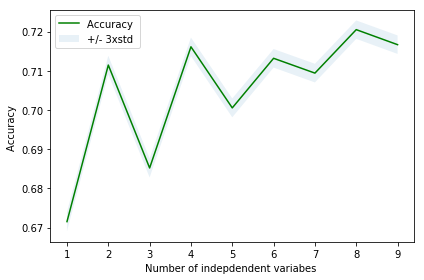

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of indepdendent variabes ')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7204916237818898 with k= 8


## Decision Tree

In [24]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df[['COLLISIONTYPE', 'PERSONCOUNT','VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']] .values  #.astype(float)
X[0:5]

array([[0, 2, 2, 1, 4, 8, 5],
       [9, 2, 2, 4, 6, 8, 2],
       [5, 4, 3, 4, 4, 0, 5],
       [4, 3, 3, 4, 1, 0, 5],
       [0, 2, 2, 1, 6, 8, 5]])

In [27]:
Y = df['SEVERITYCODE.1'].values
Y[0:5]

array([2, 1, 1, 1, 2])

In [28]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [47]:
X_testset

array([[5, 0, 2, ..., 1, 0, 5],
       [0, 3, 2, ..., 1, 0, 2],
       [3, 2, 1, ..., 1, 0, 5],
       ...,
       [7, 2, 2, ..., 1, 0, 5],
       [5, 2, 2, ..., 1, 0, 5],
       [9, 2, 2, ..., 4, 0, 5]])

In [47]:
X_trainset.shape

(127862, 7)

In [50]:
X_testset.shape

(54798, 7)

In [48]:
y_trainset.shape

(127862,)

In [49]:
y_testset.shape

(54798,)

In [29]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
car_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [31]:
car_Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction

In [32]:
predTree = car_Tree.predict(X_testset)

### Evaluation

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7408299572977116


### Visualisation

In [ ]:
##!conda install -c conda-forge pydotplus -y
##!conda install -c conda-forge python-graphviz -y

In [34]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'pydotplus'

In [98]:
dot_data = StringIO()
filename = "carseveritytree.png"
featureNames = df.columns[0:7]
targetNames = df["SEVERITYCODE.1"].unique().tolist()
out=tree.export_graphviz(car_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


AttributeError: 'NoneType' object has no attribute 'write_png'

## Support Vector Machines

In [93]:
df

,LOCATION,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,,,,,,,,,
2,5TH AVE NE AND NE 103RD ST,2,0,2,2,1,4,8,5
1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,9,2,2,4,6,8,2
1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,5,4,3,4,4,0,5
1,2ND AVE BETWEEN MARION ST AND MADISON ST,1,4,3,3,4,1,0,5
2,SWIFT AVE S AND SWIFT AV OFF RP,2,0,2,2,1,6,8,5
1,24TH AVE NW AND NW 85TH ST,1,0,2,2,1,1,0,5
1,DENNY WAY AND WESTLAKE AVE,1,0,2,2,1,6,8,5
2,BROADWAY AND E PIKE ST,2,1,3,1,1,1,0,5
1,PINE ST BETWEEN 5TH AVE AND 6TH AVE,1,5,2,2,4,1,0,5


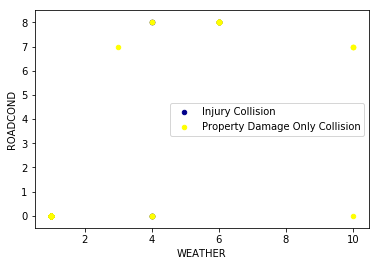

In [35]:
ax = df[df['SEVERITYCODE.1'] == 2][0:50].plot(kind='scatter', x='WEATHER', y='ROADCOND', color='DarkBlue', label='Injury Collision');
df[df['SEVERITYCODE.1'] == 1][0:50].plot(kind='scatter', x='WEATHER', y='ROADCOND', color='Yellow', label='Property Damage Only Collision', ax=ax);
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146128, 7) (146128,)
Test set: (36532, 7) (36532,)


### MOdelling SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

### Evaluation SVM

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage Only Collision(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix')

F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

Jaccard Index for accuracy

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

### Rebuilding the model using kernel=linear

In [ ]:
# write your code here
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

## Logistic Regression

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [59]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 2, 1])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

### jaccard index evaluration

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, yhat))

### Log loss

In [64]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5808543783835642

## Multiple Regression

In [82]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_mr = np.asanyarray(df[['WEATHER','ROADCOND','LIGHTCOND']])
y_mr = np.asanyarray(df[['SEVERITYCODE.1']])
regr.fit (x_mr, y_mr)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.02296505  0.00816658 -0.00572371]]


In [83]:
y_hat= regr.predict(df[['WEATHER','ROADCOND','LIGHTCOND']])
x = np.asanyarray(df[['WEATHER','ROADCOND','LIGHTCOND']])
y = np.asanyarray(df[['SEVERITYCODE.1']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.21
Variance score: 0.01


In [88]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_mr1 = np.asanyarray(df[['VEHCOUNT','ROADCOND','LIGHTCOND']])
y_mr1 = np.asanyarray(df[['SEVERITYCODE.1']])
regr.fit (x_mr, y_mr)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.02296505  0.00816658 -0.00572371]]


In [89]:
y_hat1= regr.predict(df[['VEHCOUNT','ROADCOND','LIGHTCOND']])
x = np.asanyarray(df[['VEHCOUNT','ROADCOND','LIGHTCOND']])
y = np.asanyarray(df[['SEVERITYCODE.1']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.22
Variance score: -0.01


<div id="visualization_analysis">
    <h2>Results and Discussion</h2> 
</div>

The results in order of descending order of prediction accuracy

Decision Tree: 0.740
K-NN: 0.72
SVM: F1 score (0.64), Jaccard Index (0.70)
LR: 0.58 (log loss)

Taking into consideration the define data set,  there is clear a high prediction of a severe car accident . However, this severity level is "Property damage only collission" and not an "Injury Collission".

<div id="visualization_analysis">
    <h2>Conclusion</h2> 
</div>

According to the results, the Decision Tree Algorithm is most effective in predicting the accuracy of a car accident with highest severity. The K-NN and SVM models are stable too and point in the same direction with a similar error ratio as for Decision Tree. Hence the results are rationally approaching the actual value of the target. 
It is recommended to deploy the Decision tree model for this specific case of Predictive analysis.
In is therefore recommended to avoid this route until the prediction accuracy falls below 0.15.
